In [1]:
import numpy as np
# import logging
# logging.getLogger('tensorflow').disabled = True
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
tf.keras.utils.disable_interactive_logging()


In [2]:
physical_devices = tf.config.list_physical_devices('GPU')
try:
  tf.config.experimental.set_memory_growth(physical_devices[0], True)
except:
  print('Invalid device or cannot modify virtual devices once initialized.',physical_devices)
  pass


Invalid device or cannot modify virtual devices once initialized. []


In [3]:
batch_size = 32
img_height = 180
img_width = 180
data_dir = 'Datasets/Imgs/'

In [4]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir+'train',
  image_size=(img_height, img_width),
  batch_size=batch_size)

NotFoundError: Could not find directory Datasets/Imgs/train

In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir+'val',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 321 files belonging to 2 classes.


In [ ]:
test_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir+'test',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 324 files belonging to 2 classes.


In [ ]:
class_names = train_ds.class_names
num_classes = len(class_names)


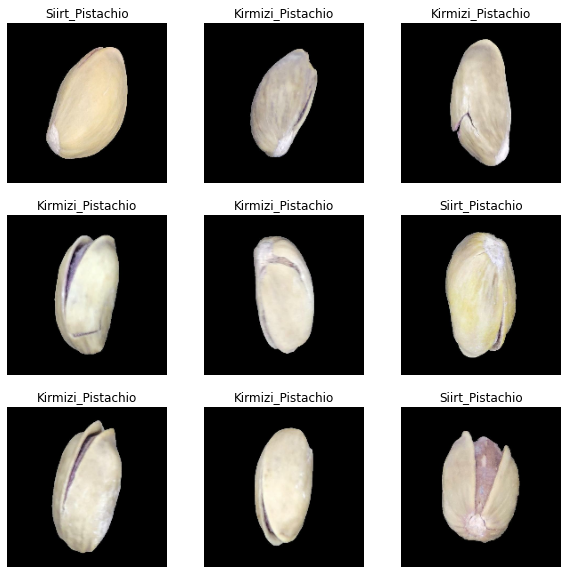

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
normalization_layer = layers.Rescaling(1./255)
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089
0.0 0.9761439


In [ ]:
from tensorflow.keras.callbacks import TensorBoard
log_folder = 'logs'

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

In [ ]:
callbacks = [TensorBoard(log_dir=log_folder,
                         histogram_freq=1,
                         write_graph=True,
                         write_images=True,
                         update_freq='epoch',
                         profile_batch=1,
                         embeddings_freq=1)]

In [ ]:
model=Sequential([
    tf.keras.layers.Flatten(input_shape=(180,180,3), name='layers_flatten'),
    tf.keras.layers.Dense(512, activation='relu', name='layers_dense'),
    tf.keras.layers.Dropout(0.2, name='layers_dropout'),
    tf.keras.layers.Dense(10, activation='softmax', name='layers_dense_2')
])
model.compile(
      optimizer='adam',
      loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
      metrics=['accuracy']
)
epochs = 15
model.summary()
history = model.fit(
train_ds,
      validation_data=val_ds,
      epochs=epochs
   )
model.save('tf/pist')

c:\Users\ponku\anaconda3\lib\site-packages\keras\backend.py:5585: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


INFO:tensorflow:Assets written to: tf/pist\assets


INFO:tensorflow:Assets written to: tf/pist\assets


In [ ]:
predictions = model.predict(test_ds)
score = tf.nn.softmax(predictions[0])
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to Siirt_Pistachio with a 23.20 percent confidence.


In [ ]:
%load_ext tensorboard
log_folder = 'logs'

In [ ]:
%tensorboard --logdir={log_folder}

Reusing TensorBoard on port 6006 (pid 11336), started 1 day, 23:25:11 ago. (Use '!kill 11336' to kill it.)

In [ ]:
# batch_size = 3
# img_height, img_width = 28, 28
# input_shape = (img_height, img_width, 3)

In [ ]:
# def create_data(data_bs, targets):
#     data_bs = pathlib.Path(data_bs)
#     splitfolders.ratio(data_bs, output='Imgs/', seed=1234, ratio=(0.7, 0.15, 0.15), group_prefix=None)
#     data_gen = ImageDataGenerator(rescale=1.0 / 255)
    
#     train_ds = data_gen.flow_from_directory('Imgs/train/', target_size=(img_height, img_width),
#                                                 class_mode='binary', batch_size=batch_size, subset='training')
#     val_ds = data_gen.flow_from_directory('Imgs/val/', target_size=(img_height, img_width),
#                                               class_mode='binary', batch_size=batch_size, shuffle=False)
#     return train_ds, val_ds

# train_ds, val_ds = create_data(data_bs='../Datasets/Pistachio_Image_Dataset/Pistachio_Image_Dataset/', targets=2)